In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

# Load and inspect data

In [2]:
df = pd.read_csv("data/data-attendance-3.txt")
print(len(df))
print(df.dtypes)
df.head(5)

2396
PersonID     int64
A            int64
Score        int64
Weather     object
Y            int64
dtype: object


,PersonID,A,Score,Weather,Y
0,1,0,69,B,1
1,1,0,69,A,1
2,1,0,69,C,1
3,1,0,69,A,1
4,1,0,69,B,1


# Run Stan

In [3]:
model = CmdStanModel(stan_file="model/exercise5-4.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chapter05/model/exercise5-4


CmdStanModel: name=exercise5-4
	 stan_file=/workdir/chapter05/model/exercise5-4.stan
	 exe_file=/workdir/chapter05/model/exercise5-4
	 compiler_optons=stanc_options=None, cpp_options=None


In [4]:
data = {
    "I" : len(df),
    "A" : df["A"].values,
    "Score" : df["Score"].values/200,
    "Cloudy" : [1 if x == "B" else 0 for x in df["Weather"].values],
    "Rainy" : [1 if x == "C" else 0 for x in df["Weather"].values],
    "Y" : df["Y"].values
}

In [5]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


# Inspect the result

In [6]:
print(type(fit))
print(fit)

<class 'cmdstanpy.stanfit.CmdStanMCMC'>
CmdStanMCMC: model=exercise5-4 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-1-lppi_e52.csv
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-2-mb6lnb2r.csv
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-3-p9zk40ik.csv
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-4-5osblq7m.csv
 output_files:
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-1-lppi_e52-stdout.txt
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-2-mb6lnb2r-stdout.txt
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-3-p9zk40ik-stdout.txt
	/tmp/tmplfvd0hdm/exercise5-4-202010271210-4-5osblq7m-stdout.txt


In [7]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 2408)


In [8]:
fit.stan_variables()

{'b': array([[ 0.261664, -0.579165,  1.9873  ],
        [ 0.360637, -0.574497,  1.85836 ],
        [ 0.421872, -0.688255,  1.76563 ],
        ...,
        [ 0.578221, -0.603436,  1.42922 ],
        [ 0.373966, -0.420428,  1.44362 ],
        [ 0.429397, -0.41953 ,  1.51315 ]]),
 'bw': array([[-0.649463, -0.492473],
        [-0.392484, -0.469407],
        [-0.444874, -0.407945],
        ...,
        [-0.283202, -0.276054],
        [-0.478955, -0.291574],
        [-0.471856, -0.282352]]),
 'q': array([[0.573909, 0.720568, 0.611782, ..., 0.660654, 0.543326, 0.543326],
        [0.647778, 0.731407, 0.630034, ..., 0.669523, 0.558881, 0.558881],
        [0.642479, 0.737113, 0.650917, ..., 0.647394, 0.54975 , 0.54975 ],
        ...,
        [0.687423, 0.744844, 0.688957, ..., 0.66424 , 0.600175, 0.600175],
        [0.597019, 0.705165, 0.641169, ..., 0.661084, 0.593042, 0.593042],
        [0.617648, 0.721404, 0.661298, ..., 0.68111 , 0.616927, 0.616927]])}

In [9]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1379.69,0.039957,1.58854,-1382.76,-1379.39,-1377.72,1580.57,31.8297,0.999953
b[1],0.27,0.005000,0.24000,-0.13,0.27,0.66,2216.00,45.0000,1.000000
b[2],-0.62,0.001600,0.09200,-0.77,-0.62,-0.48,3189.00,64.0000,1.000000
b[3],2.00,0.007800,0.37000,1.40,2.00,2.60,2288.00,46.0000,1.000000
bw[1],-0.38,0.001900,0.11000,-0.55,-0.38,-0.21,2978.00,60.0000,1.000000
...,...,...,...,...,...,...,...,...,...
q[2392],0.56,0.000420,0.02500,0.52,0.56,0.60,3576.00,72.0000,1.000000
q[2393],0.65,0.000390,0.02100,0.62,0.65,0.68,2807.00,57.0000,1.000000
q[2394],0.65,0.000390,0.02100,0.62,0.65,0.68,2807.00,57.0000,1.000000


In [10]:
# Check the convergence
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [11]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmplfvd0hdm/exercise5-4-202010271210-1-lppi_e52.csv, /tmp/tmplfvd0hdm/exercise5-4-202010271210-2-mb6lnb2r.csv, /tmp/tmplfvd0hdm/exercise5-4-202010271210-3-p9zk40ik.csv, /tmp/tmplfvd0hdm/exercise5-4-202010271210-4-5osblq7m.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmplfvd0hdm/exercise5-4-202010271210-1-lppi_e52.csv, /tmp/tmplfvd0hdm/exercise5-4-202010271210-2-mb6lnb2r.csv, /tmp/tmplfvd0hdm/exercise5-4-202010271210-3-p9zk40ik.csv, /tmp/tmplfvd0hdm/exercise5-4-202010271210-4-5osblq7m.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


In [17]:
fit_summary.loc[["bw[1]", "bw[2]"]]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
bw[1],-0.38,0.0019,0.11,-0.55,-0.38,-0.21,2978.0,60.0,1.0
bw[2],-0.50,0.0024,0.13,-0.71,-0.50,-0.28,2907.0,59.0,1.0


# Plot the result

In [12]:
q_percentiles = np.percentile(fit.stan_variable("q"), [10.0, 50.0, 90.0], axis=0)
q_percentiles.shape

(3, 2396)

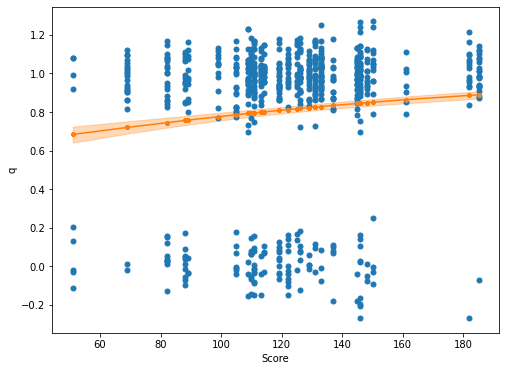

In [13]:
# Plot score vs q (for weather = 'A' and 'A' = 0 only)

df_tmp = df.sort_values(by=["Score"])[["Weather", "A"]]
idx = df_tmp[(df_tmp["Weather"] == 'A') & (df_tmp['A'] == 0)].index.values

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

ax.plot(df["Score"][idx], df["Y"][idx] + 0.1*np.random.randn(len(idx)), 'o', markersize=5, color="C0")
ax.plot(df["Score"][idx], q_percentiles[1][idx], '.-', color="C1")
ax.fill_between(df["Score"][idx], q_percentiles[0][idx], q_percentiles[2][idx], alpha=0.3, color="C1")
ax.set_xlabel("Score")
ax.set_ylabel("q")
fig.show()

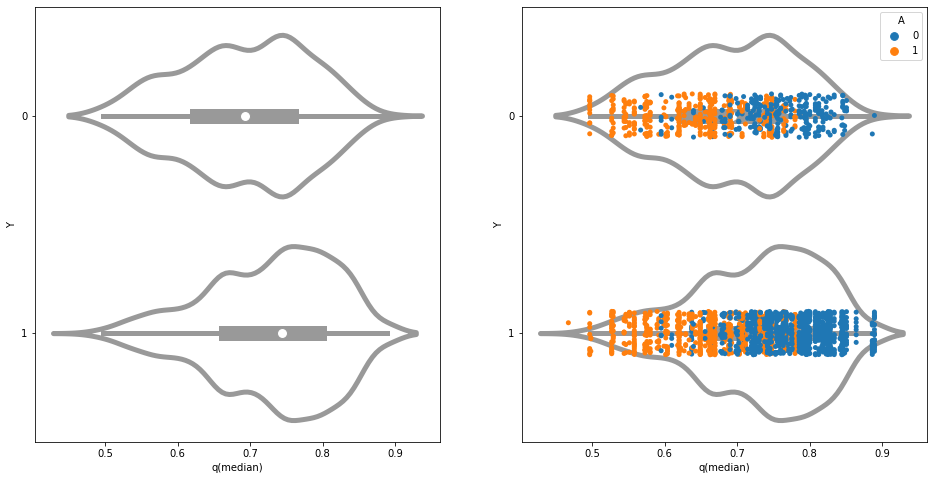

In [14]:
# prob vs. observation

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

ax = axes[0]
sns.violinplot(x=q_percentiles[1], y=df["Y"], color='white', linewidth=5, orient='h', ax=ax)
ax.set_xlabel("q(median)")

ax = axes[1]
sns.violinplot(x=q_percentiles[1], y=df["Y"], color='white', linewidth=5, orient='h', ax=ax)
sns.stripplot(x=q_percentiles[1], y=df["Y"], hue=df["A"], orient='h', ax=ax)
ax.set_xlabel("q(median)")

fig.show()

ROC AUC Score : 0.6245381810537054


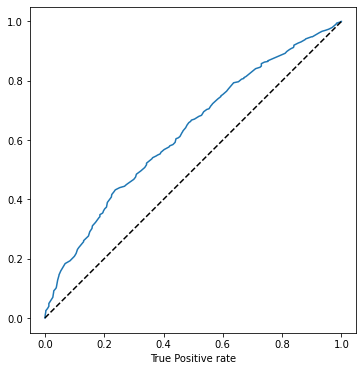

In [15]:
# ROC curve : 

print("ROC AUC Score :", roc_auc_score(df["Y"].values, q_percentiles[1]))

fpr, tpr, thresholds = roc_curve(df["Y"].values, q_percentiles[1])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("False Positive rate")
ax.set_xlabel("True Positive rate")
fig.show()